In [1]:
from datasets import load_dataset

case_hold = load_dataset("lex_glue", "case_hold")
print(case_hold["train"][1])  # View first sample

c:\Users\manan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\manan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{'context': 'Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management information, design, process, procedure, formula, invention or improvement”); Warner-Lambert Co., 427 Mass. at 49 (“ [Confidential and proprietary business information may be entitled to protection, even if such information cannot claim trade secret protection”); see, e.g., Augat, Inc., 409 Mass. at 173 (<HOLDING>). “Matters of public knowledge or of general', 'endings': ['recognizing that even if a plaintiff claims certain information constitutes trade secrets its claim may not depend on t

In [2]:
# Get dataset statistics and structure
print("Dataset structure:", case_hold)
print("\nAvailable splits:", case_hold.keys())

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3600
    })
    validation: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3900
    })
})

Available splits: dict_keys(['train', 'test', 'validation'])


In [3]:
# import os
# import pandas as pd

# # Define your custom path
# output_dir = "C:/Users/Manan/Desktop/case_hold_csv"

# # Create directory if it doesn't exist
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
#     print(f"Created directory: {output_dir}")

# # Save each split as CSV
# for split in case_hold.keys():
#     df = pd.DataFrame(case_hold[split])
#     csv_path = os.path.join(output_dir, f"case_hold_{split}.csv")
#     df.to_csv(csv_path, index=False)


In [4]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [40]:
# # Get sample text from the dataset
# sample_text = case_hold["train"][1]["context"]
# print("Original text sample:")
# print(sample_text[:500] + "...\n")  # Show first 500 chars

# Fetch the entire 'context' column as a list
sample_text = case_hold["train"]["context"]

print(f"Number of training examples: {len(sample_text)}")

# Print the first 5 contexts (truncated)
for i, ctx in enumerate(sample_text[:5]):
    print(f"\n--- Sample {i} ---")
    print(ctx[:500] + "...\n")


Number of training examples: 45000

--- Sample 0 ---
Drapeau’s cohorts, the cohort would be a “victim” of making the bomb. Further, firebombs are inherently dangerous. There is no peaceful purpose for making a bomb. Felony offenses that involve explosives qualify as “violent crimes” for purposes of enhancing the sentences of career offenders. See 18 U.S.C. § 924(e)(2)(B)(ii) (defining a “violent felony” as: “any crime punishable by imprisonment for a term exceeding one year ... that ... involves use of explosives”). Courts have found possession of...


--- Sample 1 ---
Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a se

## Basic Pre Processing 

In [42]:
# # 1. Tokenization - Sentence Level
# sentences = sent_tokenize(sample_text)
# print(f"Sentence Tokenization (first 3 of {len(sentences)} sentences):")
# for i, sentence in enumerate(sentences[:3]):
#     print(f"Sentence {i+1}: {sentence}")
# print()

# # 2. Tokenization - Word Level
# words = word_tokenize(sample_text)
# print(f"Word Tokenization (first 20 of {len(words)} words):")
# print(words[:20])
# print()

from nltk import sent_tokenize, word_tokenize

# 1. Grab the entire list of contexts
all_contexts = case_hold["train"]["context"]

# 2. Sentence‑tokenize every context
all_sentences = [sent_tokenize(ctx) for ctx in all_contexts]

# 3. Word‑tokenize every context
all_words     = [word_tokenize(ctx) for ctx in all_contexts]

print(f"Processed {len(all_contexts)} documents.")
print(f"Example doc 0: {len(all_sentences[0])} sentences, {len(all_words[0])} words.")


Processed 45000 documents.
Example doc 0: 9 sentences, 189 words.


In [43]:
print(all_words[:20])
print(all_sentences[:20])


[['Drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'Further', ',', 'firebombs', 'are', 'inherently', 'dangerous', '.', 'There', 'is', 'no', 'peaceful', 'purpose', 'for', 'making', 'a', 'bomb', '.', 'Felony', 'offenses', 'that', 'involve', 'explosives', 'qualify', 'as', '“', 'violent', 'crimes', '”', 'for', 'purposes', 'of', 'enhancing', 'the', 'sentences', 'of', 'career', 'offenders', '.', 'See', '18', 'U.S.C', '.', '§', '924', '(', 'e', ')', '(', '2', ')', '(', 'B', ')', '(', 'ii', ')', '(', 'defining', 'a', '“', 'violent', 'felony', '”', 'as', ':', '“', 'any', 'crime', 'punishable', 'by', 'imprisonment', 'for', 'a', 'term', 'exceeding', 'one', 'year', '...', 'that', '...', 'involves', 'use', 'of', 'explosives', '”', ')', '.', 'Courts', 'have', 'found', 'possession', 'of', "a'bomb", 'to', 'be', 'a', 'crime', 'of', 'violence', 'based', 'on', 'the', 'lack', 'of', 'a', 'nonviolent', 'purpose', 'for', 'a', 'b

In [ ]:
# # 3. Converting to lowercase
# words_lower = [word.lower() for word in all_words]
# print("After converting to lowercase (first 20):")
# print(words_lower[:20])
# print()

# all_words: List[List[str]] from earlier
all_words_lower = [
    [token.lower() for token in doc_tokens]
    for doc_tokens in all_words
]

# Let’s inspect the first document:
print("Doc 0, first 20 tokens before lowercase:")
print(all_words[0][:])
print("\nDoc 0, first 20 tokens after lowercase:")
print(all_words_lower[10][:])


Doc 0, first 20 tokens before lowercase:
['Drapeau', '’', 's', 'cohorts', ',', 'the', 'cohort', 'would', 'be', 'a', '“', 'victim', '”', 'of', 'making', 'the', 'bomb', '.', 'Further', ',', 'firebombs', 'are', 'inherently', 'dangerous', '.', 'There', 'is', 'no', 'peaceful', 'purpose', 'for', 'making', 'a', 'bomb', '.', 'Felony', 'offenses', 'that', 'involve', 'explosives', 'qualify', 'as', '“', 'violent', 'crimes', '”', 'for', 'purposes', 'of', 'enhancing', 'the', 'sentences', 'of', 'career', 'offenders', '.', 'See', '18', 'U.S.C', '.', '§', '924', '(', 'e', ')', '(', '2', ')', '(', 'B', ')', '(', 'ii', ')', '(', 'defining', 'a', '“', 'violent', 'felony', '”', 'as', ':', '“', 'any', 'crime', 'punishable', 'by', 'imprisonment', 'for', 'a', 'term', 'exceeding', 'one', 'year', '...', 'that', '...', 'involves', 'use', 'of', 'explosives', '”', ')', '.', 'Courts', 'have', 'found', 'possession', 'of', "a'bomb", 'to', 'be', 'a', 'crime', 'of', 'violence', 'based', 'on', 'the', 'lack', 'of', 'a',

In [78]:
import spacy
from nltk.corpus import stopwords
from collections import Counter

# Load spaCy model
nlp = spacy.load('en_core_web_lg')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to extract entities and filter stopwords for each label
def extract_entities_and_filter_stopwords(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Initialize a dictionary to store filtered words by label
filtered_words_by_label = {}

# Loop through all contexts in the dataset
for context in case_hold["train"]["context"]:
    entities = extract_entities_and_filter_stopwords(context)
    
    # For each entity, filter out stopwords
    for entity, label in entities:
        filtered_words = [w for w in entity.split() if w.lower() not in stop_words]
        
        # Save filtered words by label
        if label not in filtered_words_by_label:
            filtered_words_by_label[label] = []
        
        filtered_words_by_label[label].extend(filtered_words)

# Display results for each label
for label, words in filtered_words_by_label.items():
    print(f"\nFiltered words for label {label}:")
    print(f"Total words: {len(words)}")
    print(f"First 20 words: {words[:20]}")




Filtered words for label PERSON:
Total words: 167056
First 20 words: ['Drapeau', 'Taylor', 'Taylor', 'Defs', 'N.D.N.Y.', 'Norwood', 'Appellant', 'Norwood', 'Ramirez', 'Manfredi', 'LaLonde', 'Pruitt', 'Pruitt', 'Cir.1974', 'D.Ariz.1990', 'Blevins', 'N.S.', 'Johnson', 'Miles', 'Williamson']

Filtered words for label DATE:
Total words: 124429
First 20 words: ['one', 'year', '49', '1992', '2006', '1995', '14', '33', '38', '2011', '9', '1005', '1007', '1461', '1995', '1986', '1399', 'year', '2008', 'Tex.']

Filtered words for label GPE:
Total words: 110335
First 20 words: ['See', 'United', 'States', 'United', 'States', 'Mass.', 'Mass.', 'S.C.', 'S.C.', 'N.C.', 'U.S.A.', 'New', 'York', 'City', 'Triathlon', 'See', 'United', 'States', 'United', 'States']

Filtered words for label ORG:
Total words: 327750
First 20 words: ['Newman', 'Dodge', 'Colameta', 'Colameta', 'G.L.c', 'G.L.c', 'Warner-Lambert', 'Co.', 'Augat,', 'Inc.', 'Court', 'S.E.2d', 'Court', 'Capco', 'Summerville,', 'Inc.', 'J.H.', '

In [73]:
import string

# Assume filtered_words is a flat list of tokens (after stopword removal)
filtered_words_clean = [word for word in filtered_words if word.isalnum()]

# OR, if you prefer to exclude based on string.punctuation (in case of edge punctuation):
# filtered_words_clean = [word for word in filtered_words if word not in string.punctuation]

# Check the result
print("Filtered words after punctuation removal (first 20):")
print(filtered_words_clean[:20])


Filtered words after punctuation removal (first 20):
['drapeau', 'cohorts', 'cohort', 'would', 'victim', 'making', 'bomb', 'firebombs', 'inherently', 'dangerous', 'peaceful', 'purpose', 'making', 'bomb', 'felony', 'offenses', 'involve', 'explosives', 'qualify', 'violent']


In [75]:
from collections import Counter

# If filtered_words_clean is already a flat list of tokens
# (no need to flatten again)
word_freq = Counter(filtered_words_clean)

# Report total unique words and top 15
print(f"Total unique words after preprocessing: {len(word_freq)}")
print("\nMost common 15 words:")
for word, count in word_freq.most_common(15):
    print(f"{word}: {count}")

# Print the most occurring word and its count
most_common_word, count = word_freq.most_common(1)[0]
print("\nMost occurring word:")
print(f"'{most_common_word}' occurred {count} times.")


Total unique words after preprocessing: 88797

Most common 15 words:
see: 50968
holding: 47114
court: 46724
state: 22464
states: 17938
also: 17767
united: 17033
id: 13775
evidence: 13220
defendant: 12775
case: 12356
trial: 12126
law: 11705
would: 11059
may: 11044

Most occurring word:
'see' occurred 50968 times.


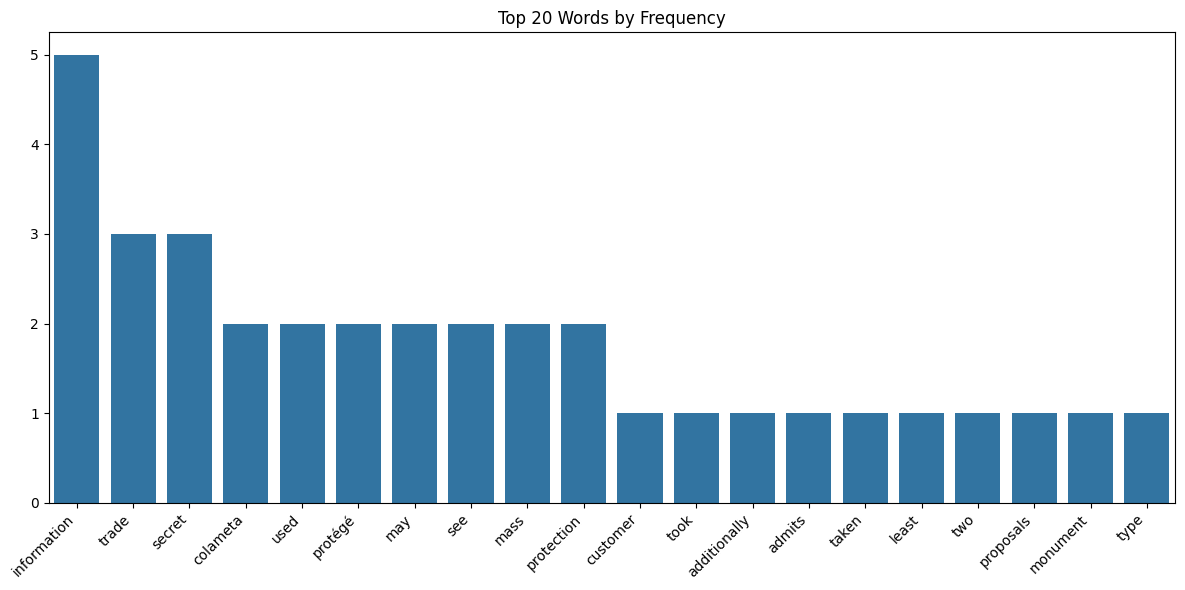

In [54]:
# 6. Visualize frequency distribution
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(20))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Word frequency dataframe (top 10 rows):
          Word  Frequency
0  information          5
1        trade          3
2       secret          3
3     colameta          2
4         used          2
5      protégé          2
6          may          2
7          see          2
8         mass          2
9   protection          2


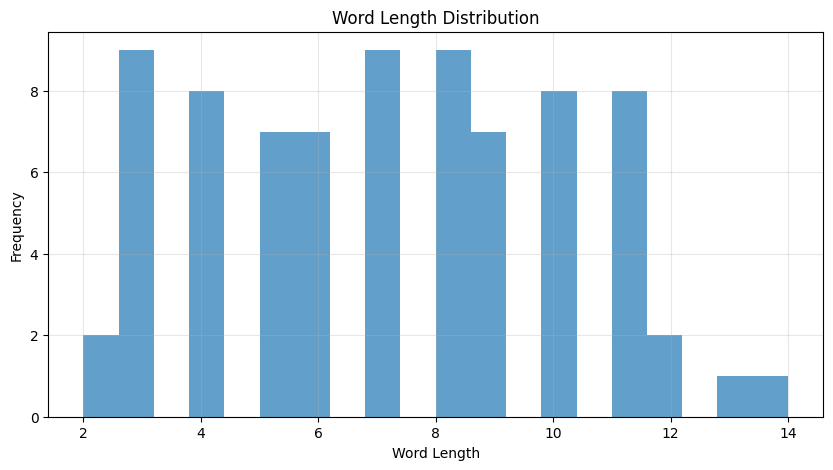


Average word length after preprocessing: 7.14 characters


In [11]:
# 7. Create a DataFrame for better analysis
word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['Word', 'Frequency'])
print("\nWord frequency dataframe (top 10 rows):")
print(word_freq_df.head(10))

# 8. Word length distribution
word_lengths = [len(word) for word in filtered_words]
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=20, alpha=0.7)
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAverage word length after preprocessing: {sum(word_lengths)/len(word_lengths):.2f} characters")

In [ ]:
filtered_words_clean

# filtered_words_clean is after preprocessing

## Applying NER 
##### For Entity Extraction

In [12]:
# %pip install spacy
# !python -m spacy download en_core_web_lg

In [13]:
import spacy
import spacy.cli
from spacy import displacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the large English model with good NER capabilities
nlp = spacy.load('en_core_web_lg')

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


c:\Users\manan\anaconda3\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [ ]:
import spacy
from collections import Counter
from tqdm import tqdm  # optional, for progress bar

# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Store all entities from all rows
all_entities = []

# Loop through all contexts in the dataset
for context in tqdm(case_hold["train"]["context"]):  # tqdm adds progress bar
    entities = extract_entities(context)
    all_entities.extend(entities)  # Append to the full list

# Display a sample of extracted entities
print("Sample of entities extracted:")
for entity, label in all_entities[:15]:
    print(f"{entity} -> {label}")

# Count entity types
entity_counts = Counter([label for _, label in all_entities])
print("\nEntity type distribution:")
for label, count in entity_counts.most_common():
    print(f"{label}: {count}")


ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'list'>

In [77]:
import spacy
from collections import Counter
from tqdm import tqdm  # optional, for progress bar

# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Store all entities from all rows
all_entities = []

# Loop through all contexts in the dataset
for context in tqdm(case_hold["train"]["context"]):  # tqdm adds progress bar
    entities = extract_entities(context)
    all_entities.extend(entities)  # Append to the full list

# Display a sample of extracted entities
print("Sample of entities extracted:")
for entity, label in all_entities[:15]:
    print(f"{entity} -> {label}")

# Count entity types
entity_counts = Counter([label for _, label in all_entities])
print("\nEntity type distribution:")
for label, count in entity_counts.most_common():
    print(f"{label}: {count}")


  7%|▋         | 3340/45000 [01:13<15:13, 45.59it/s]


KeyboardInterrupt: 

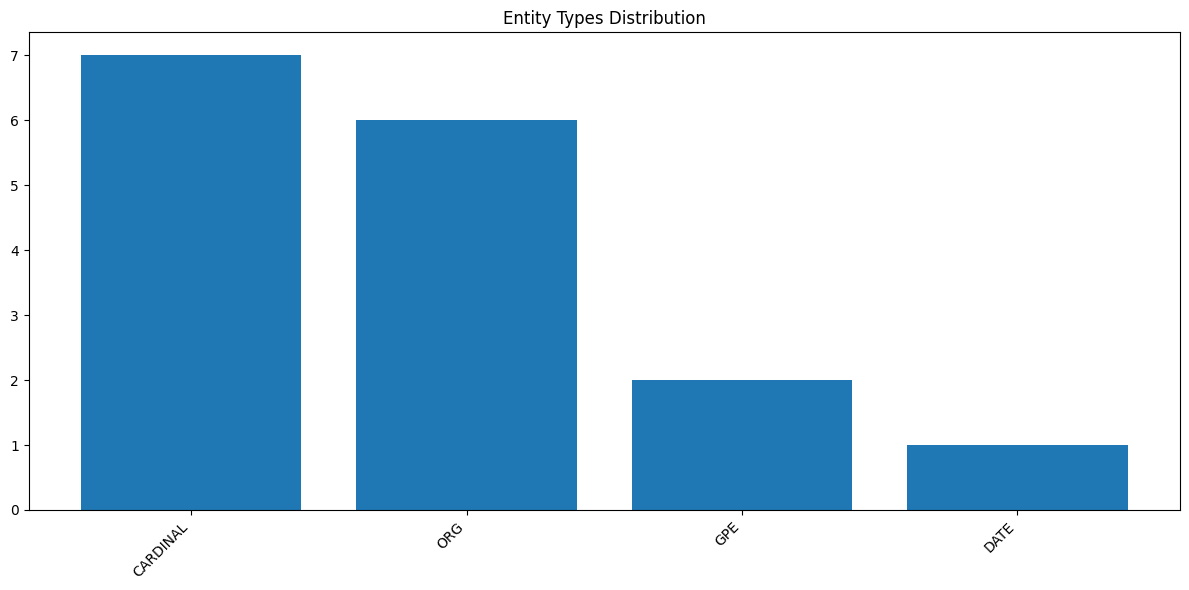

In [15]:
# Visualize entity distribution
plt.figure(figsize=(12, 6))
labels, counts = zip(*entity_counts.most_common())
plt.bar(labels, counts)
plt.title('Entity Types Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Visualize entities in text (first 500 characters)
short_sample = sample_text[:500]
doc = nlp(short_sample)
displacy.render(doc, style="ent", jupyter=True)

# Extract specific entity types of interest
legal_entities = {
    "PERSON": [],     # People names
    "ORG": [],        # Organizations 
    "DATE": [],       # Dates
    "MONEY": [],      # Monetary values
    "LAW": [],        # Laws (may be captured as ORG in some models)
    "GPE": [],        # Geopolitical entities (countries, cities)
    "NORP": []        # Nationalities, religious or political groups
}

In [17]:
# Populate the entity lists
for entity, label in entities:
    if label in legal_entities:
        legal_entities[label].append(entity)

# Display most common entities by type
print("\n--- Most common entities by type ---")
for entity_type, entities_list in legal_entities.items():
    if entities_list:
        entity_counter = Counter(entities_list)
        print(f"\n{entity_type}:")
        for entity, count in entity_counter.most_common(7):
            print(f"  • {entity}: {count}")



--- Most common entities by type ---

ORG:
  • Colameta: 2
  • G.L.c: 2
  • Warner-Lambert Co.: 1
  • Augat, Inc.: 1

DATE:
  • 49: 1

GPE:
  • Mass.: 2


In [18]:
# Create a dataframe with all entities for easier analysis
entity_df = pd.DataFrame(entities, columns=['Entity', 'Type'])
print("\nEntity DataFrame Preview:")
print(entity_df.head(20))


Entity DataFrame Preview:
                Entity      Type
0             Colameta       ORG
1             Colameta       ORG
2         at least two  CARDINAL
3                G.L.c       ORG
4                  266  CARDINAL
5                G.L.c       ORG
6                   93  CARDINAL
7                   42  CARDINAL
8   Warner-Lambert Co.       ORG
9                  427  CARDINAL
10               Mass.       GPE
11                  49      DATE
12         Augat, Inc.       ORG
13                 409  CARDINAL
14               Mass.       GPE
15                 173  CARDINAL


In [19]:
# # Save entities to CSV
# entity_df.to_csv('legal_entities.csv', index=False)
# print("\nEntities saved to legal_entities.csv")

## TF-IDF and GloVE Implementation

#### Performing TF-IDF 

In [20]:
# TF-IDF Implementation Cell
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

# Get a larger sample of texts for better analysis
sample_size = 1000
texts = [case_hold["train"][i]["context"] for i in range(min(sample_size, len(case_hold["train"])))]


In [21]:
# Initialize and fit TF-IDF Vectorizer
# Parameters:
# - max_features: Limit vocabulary size to most frequent terms
# - min_df: Ignore terms that appear in less than 5 documents
# - max_df: Ignore terms that appear in more than 90% of documents (like stopwords)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.9)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Get feature names (terms) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(feature_names)} terms")


Vocabulary size: 3228 terms


In [22]:
# Get the TF-IDF scores for the first document
first_doc_vector = tfidf_matrix[1]
first_doc_tfidf = [(feature_names[idx], first_doc_vector[0, idx]) 
                   for idx in first_doc_vector.nonzero()[1]]
# Sort by TF-IDF score (descending)
sorted_tfidf = sorted(first_doc_tfidf, key=lambda x: x[1], reverse=True)


In [23]:
# Display most important terms in first document
print("\nTop 20 terms with highest TF-IDF score in first document:")
for term, score in sorted_tfidf[:20]:
    print(f"{term}: {score:.4f}")


Top 20 terms with highest TF-IDF score in first document:
information: 0.4496
trade: 0.3743
or: 0.2645
mass: 0.2124
protection: 0.1915
used: 0.1673
scientific: 0.1280
customer: 0.1280
design: 0.1248
production: 0.1248
technical: 0.1248
represents: 0.1248
anything: 0.1248
records: 0.1220
defining: 0.1195
173: 0.1173
409: 0.1173
took: 0.1153
management: 0.1088
266: 0.1088


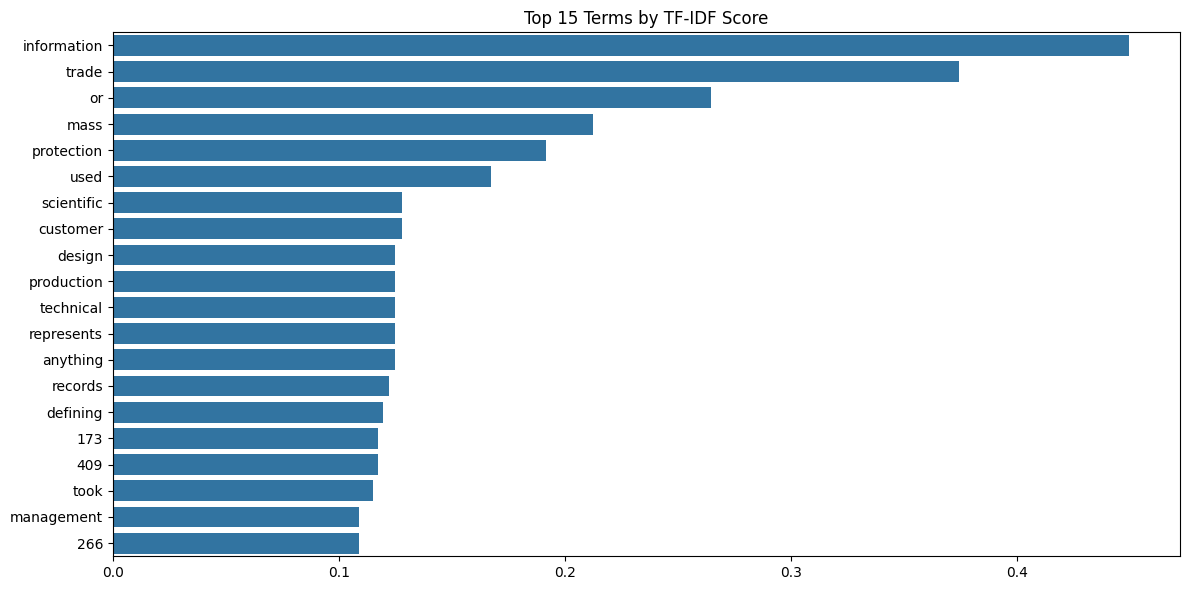

In [24]:
# Visualize top terms
plt.figure(figsize=(12, 6))
terms, scores = zip(*sorted_tfidf[:20])
sns.barplot(x=list(scores), y=list(terms))
plt.title('Top 15 Terms by TF-IDF Score')
plt.tight_layout()
plt.show()

#### Performing GloVe

In [25]:
# %pip install sentence-transformers
# %pip install keras
# %pip install tensorflow

In [26]:
import numpy as np
import tensorflow as tf
import pandas as pd

def load_glove_subset(glove_path, vocab):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            if word in vocab:
                embeddings[word] = np.asarray(values[1:], dtype='float32')
    return embeddings


In [27]:
import numpy as np

# Load GloVe embeddings
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")
    return embeddings_index

# Example path: "glove.6B.100d.txt"
glove_path = r"C:\Users\manan\OneDrive\Desktop\NLP project\glove.6B\glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_path)


Loaded 400000 word vectors from GloVe.


In [28]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def text_to_glove_vector(text, embeddings_index, embedding_dim=100):
    words = word_tokenize(text.lower())
    valid_embeddings = [embeddings_index[word] for word in words if word in embeddings_index]
    if not valid_embeddings:
        return np.zeros(embedding_dim)
    return np.mean(valid_embeddings, axis=0)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
sample_text = case_hold["train"][1]["context"]
sample_vector = text_to_glove_vector(sample_text, glove_embeddings)

print("Vector shape:", sample_vector.shape)
print("Vector snippet:", sample_vector[:15])


Vector shape: (100,)
Vector snippet: [-0.02638008  0.17604445  0.30615187 -0.12912828  0.11680342  0.0489452
 -0.04019602  0.08787453 -0.00422118 -0.04363058  0.23426843 -0.22382845
  0.2065837   0.1589205   0.24372827]


In [30]:
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')

# Step 1: Extract text and tokenize
texts = [case_hold["train"][0]["context"] for i in range(50)]  # Increase 50 to get more
all_tokens = []

for text in texts:
    tokens = word_tokenize(text.lower())
    all_tokens.extend(tokens)

# Step 2: Get most common words
word_freq = Counter(all_tokens)
most_common_words = [word for word, count in word_freq.most_common(20)]

# Step 3: Filter words that exist in GloVe
valid_words = [word for word in most_common_words if word in glove_embeddings]
word_vectors = np.array([glove_embeddings[word] for word in valid_words])  # <-- defined here


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


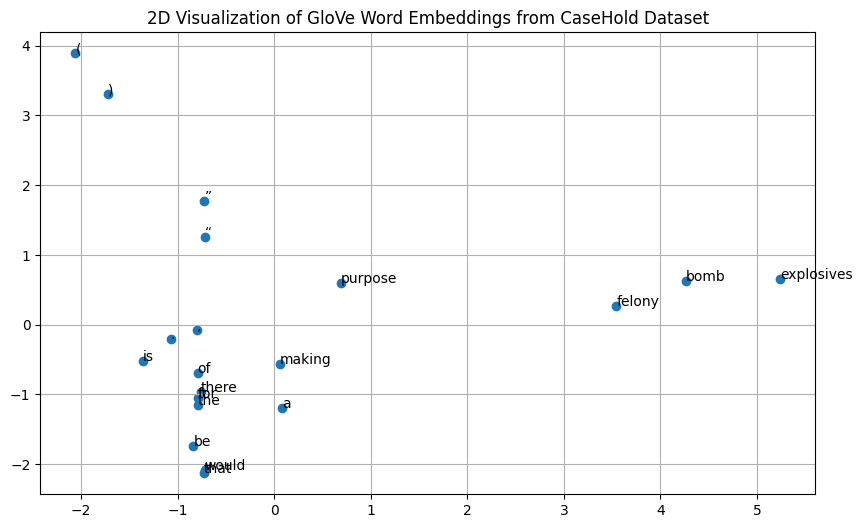

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 4: Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1])

# Label points
for i, word in enumerate(valid_words):
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))

plt.title("2D Visualization of GloVe Word Embeddings from CaseHold Dataset")
plt.grid(True)
plt.show()


Loaded 1000 preprocessed documents
Created 100 document vectors using filtered words
Vector shape: (100, 100)


c:\Users\manan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\manan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


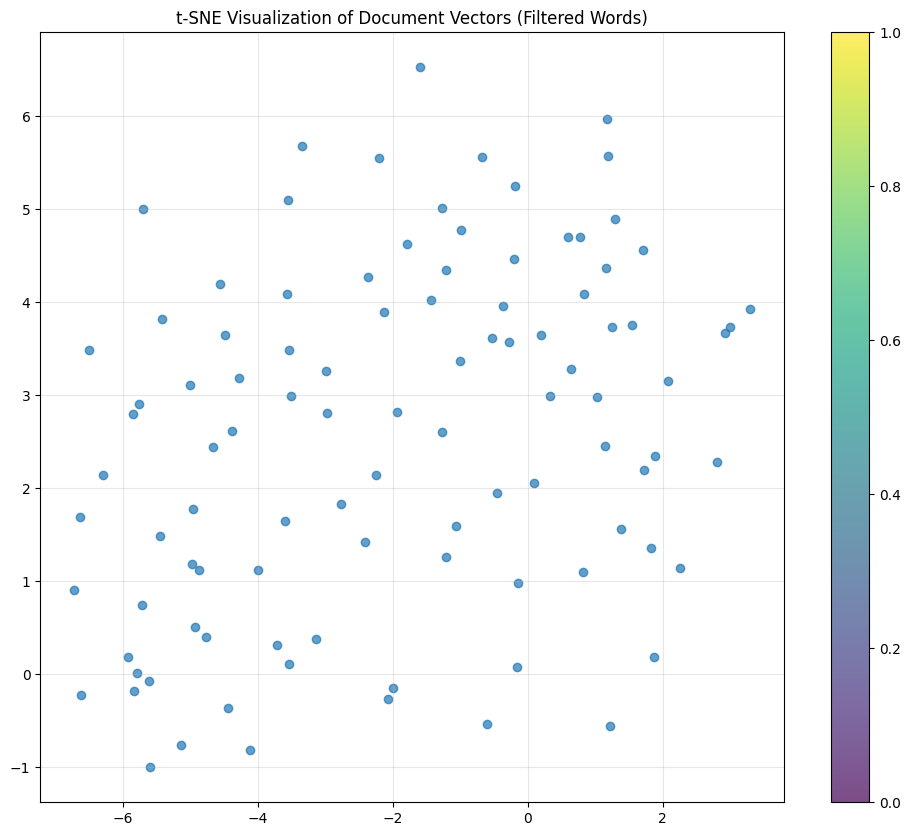

In [35]:
# Replace the text vectorization part in your GloVe implementation
# Load the preprocessed texts
with open(preprocessed_file, "r", encoding="utf-8") as f:
    filtered_texts = [line.strip() for line in f.readlines()]

print(f"Loaded {len(filtered_texts)} preprocessed documents")

# Function to create document vectors using filtered words
def text_to_glove_vector(text, embeddings_index, embedding_dim=100):
    # No need for tokenization and stopword removal as the text is already preprocessed
    words = text.split()
    valid_embeddings = [embeddings_index[word] for word in words if word in embeddings_index]
    if not valid_embeddings:
        return np.zeros(embedding_dim)
    return np.mean(valid_embeddings, axis=0)

# Create GloVe vectors for all preprocessed texts
preprocessed_vectors = []
for text in filtered_texts[:100]:  # Adjust sample size as needed
    vector = text_to_glove_vector(text, glove_embeddings)
    preprocessed_vectors.append(vector)

preprocessed_vectors = np.array(preprocessed_vectors)
print(f"Created {len(preprocessed_vectors)} document vectors using filtered words")
print(f"Vector shape: {preprocessed_vectors.shape}")

# Visualize the document vectors
from sklearn.manifold import TSNE

# Reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(preprocessed_vectors)

# Plot
plt.figure(figsize=(12, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)
plt.title("t-SNE Visualization of Document Vectors (Filtered Words)")
plt.colorbar()
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
# Generate contract from a specific document in the dataset

# Select a specific document from the dataset
doc_index = 1  # Change this to any index you want to test
sample_doc = case_hold["train"][doc_index]["context"]

# Print a preview of the selected document
print(f"Selected document {doc_index} preview:")
print(sample_doc[:300] + "...\n")

# Process this specific document for contract generation
# 1. Extract entities
print("Extracting entities...")
doc_entities = extract_entities(sample_doc)

# 2. Organize entities by type
doc_legal_entities = {
    "PERSON": [],     # People names
    "ORG": [],        # Organizations 
    "DATE": [],       # Dates
    "MONEY": [],      # Monetary values
    "LAW": [],        # Laws
    "GPE": [],        # Geopolitical entities
    "NORP": []        # Nationalities, religious or political groups
}

for entity, label in doc_entities:
    if label in doc_legal_entities:
        doc_legal_entities[label].append(entity)

# Display found entities
print("\nEntities found in the document:")
for entity_type, entities_list in doc_legal_entities.items():
    if entities_list:
        print(f"\n{entity_type}:")
        # Show unique entities (up to 5)
        unique_entities = list(set(entities_list))[:5]
        for entity in unique_entities:
            print(f"  • {entity}")

# 3. Preprocess text for GloVe
# Tokenize and lowercase
tokens = word_tokenize(sample_doc.lower())

# Remove stopwords and non-alphanumeric tokens
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Join back to text
doc_filtered_text = " ".join(filtered_tokens)

print(f"\nPreprocessed document to {len(filtered_tokens)} tokens")

# 4. Generate contracts using this specific document
print("\nGenerating contracts using the selected document...")
demo_contract_generation(doc_legal_entities, doc_filtered_text, glove_embeddings)

# 5. For comparison, generate a contract with a different document
comparison_index = 10  # A different document for comparison
comparison_doc = case_hold["train"][comparison_index]["context"]
comparison_entities = extract_entities(comparison_doc)
comparison_legal_entities = {
    "PERSON": [], "ORG": [], "DATE": [], "MONEY": [], "LAW": [], "GPE": [], "NORP": []
}
for entity, label in comparison_entities:
    if label in comparison_legal_entities:
        comparison_legal_entities[label].append(entity)

# Preprocess comparison text
comparison_tokens = word_tokenize(comparison_doc.lower())
comparison_filtered_tokens = [word for word in comparison_tokens if word.isalnum() and word not in stop_words]
comparison_filtered_text = " ".join(comparison_filtered_tokens)

print(f"\n\n{'='*80}\nCOMPARISON DOCUMENT (document #{comparison_index}):\n{'='*80}")
print(f"Preview: {comparison_doc[:150]}...\n")

# Generate just one type of contract for comparison
contract_type = "nda"  # Choose one contract type for comparison
print(f"\n{'='*80}\nGENERATING COMPARISON {contract_type.upper()} CONTRACT\n{'='*80}")
comparison_contract = generate_contract_with_glove(
    contract_type=contract_type,
    entities=comparison_legal_entities,
    filtered_text=comparison_filtered_text,
    glove_embeddings=glove_embeddings
)
print(comparison_contract)
print(f"\nSaved comparison contract to {contract_type}_comparison_contract.md")
with open(f"{contract_type}_comparison_contract.md", "w", encoding="utf-8") as f:
    f.write(comparison_contract)

Selected document 1 preview:
Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including...

Extracting entities...

Entities found in the document:

ORG:
  • G.L.c
  • Augat, Inc.
  • Warner-Lambert Co.
  • Colameta

DATE:
  • 49

GPE:
  • Mass.

Preprocessed document to 78 tokens

Generating contracts using the selected document...


GENERATING NDA CONTRACT

# NON-DISCLOSURE AGREEMENT

THIS NON-DISCLOSURE AGREEMENT (the "Agreement") is made and entered into as of 49, by and between:

**Colameta** ("Disclosing Party") and **Colameta** ("Receiving Party").

## 1. PURPOSE

The parties wish to explore a business opportunity of mutual interest (the "Purpose"), in connection with which Disclosing Party may disclose confidential information to Receiving 

## Legal Document Generator

This section implements a document generator focused on creating appropriate legal documents based on the context of the legal text, particularly for trade secret misappropriation cases.

In [ ]:
def generate_legal_document(legal_entities, text, document_type="cease_and_desist"):
    """
    Generate appropriate legal documents based on the context and entities extracted from legal text.
    
    Parameters:
    - legal_entities: Dictionary of extracted entities by type
    - text: Original text for context analysis
    - document_type: Type of document to generate (cease_and_desist, complaint, memo)
    
    Returns:
    - String containing the generated legal document
    """
    # Extract key information from entities
    plaintiff = extract_plaintiff(legal_entities)
    defendant = extract_defendant(legal_entities)
    employer = extract_employer(legal_entities)
    locations = legal_entities.get("GPE", [])
    dates = legal_entities.get("DATE", [])
    
    # Extract key legal references and statutes
    statutes, case_law = extract_legal_references(text)
    
    # Analyze text for trade secret context
    trade_secrets = identify_trade_secrets(text)
    
    # Generate appropriate document
    if document_type == "cease_and_desist":
        return generate_cease_and_desist(plaintiff, defendant, employer, locations, 
                                        dates, statutes, case_law, trade_secrets)
    elif document_type == "complaint":
        return generate_complaint(plaintiff, defendant, employer, locations, 
                                dates, statutes, case_law, trade_secrets)
    elif document_type == "memo":
        return generate_legal_memo(plaintiff, defendant, employer, locations, 
                                 dates, statutes, case_law, trade_secrets)
    else:
        return "Unsupported document type."

In [ ]:
def extract_plaintiff(entities):
    """Extract plaintiff from entities (typically the company whose trade secrets were taken)"""
    # Look for the company that appears to be the victim
    orgs = entities.get("ORG", [])
    # Default value if we can't find a good match
    default_plaintiff = "Protégé" if "Protégé" in str(orgs) else orgs[0] if orgs else "Plaintiff Company"
    
    # In the Colameta case, Protégé is the plaintiff
    for org in orgs:
        if "Protégé" in org:
            return org
    return default_plaintiff

def extract_defendant(entities):
    """Extract defendant from entities (typically the person who took trade secrets)"""
    persons = entities.get("PERSON", [])
    orgs = entities.get("ORG", [])
    
    # Default value if we can't find a good match
    default_defendant = "Colameta" if "Colameta" in str(orgs) else persons[0] if persons else "Defendant Individual"
    
    # In the Colameta case, Colameta is the defendant
    for org in orgs:
        if "Colameta" in org:
            return org
    return default_defendant

def extract_employer(entities):
    """Extract new employer from entities"""
    orgs = entities.get("ORG", [])
    # Default value if we can't find a good match
    default_employer = "Monument" if "Monument" in str(orgs) else orgs[1] if len(orgs) > 1 else "New Employer Company"
    
    # In the Colameta case, Monument is the new employer
    for org in orgs:
        if "Monument" in org:
            return org
    return default_employer

def extract_legal_references(text):
    """Extract legal statutes and case law references from text"""
    statutes = []
    case_law = []
    
    # Extract Massachusetts trade secret laws
    if "G.L.c. 266, §30" in text:
        statutes.append("G.L.c. 266, §30")
    if "G.L.c. 93, §42" in text:
        statutes.append("G.L.c. 93, §42")
        
    # Extract case law references
    if "Warner-Lambert Co." in text:
        case_law.append("Warner-Lambert Co., 427 Mass. 49")
    if "Augat, Inc." in text:
        case_law.append("Augat, Inc., 409 Mass. 173")
        
    # If no specific references found, use default Massachusetts trade secret law
    if not statutes:
        statutes = ["Massachusetts Uniform Trade Secrets Act"]
    if not case_law:
        case_law = ["Relevant Massachusetts trade secret jurisprudence"]
        
    return statutes, case_law

def identify_trade_secrets(text):
    """Identify the trade secrets mentioned in the text"""
    trade_secrets = []
    
    # Check for common trade secret types in the text
    if "customer information" in text.lower():
        trade_secrets.append("customer information")
    if "proposal" in text.lower():
        trade_secrets.append("business proposals")
    if "technical" in text.lower():
        trade_secrets.append("technical specifications")
    if "secret scientific" in text.lower():
        trade_secrets.append("scientific information")
    if "production" in text.lower():
        trade_secrets.append("production processes")
    if "management information" in text.lower():
        trade_secrets.append("management information")
    if "design" in text.lower():
        trade_secrets.append("design specifications")
        
    # If no specific trade secrets identified, use generic description
    if not trade_secrets:
        trade_secrets = ["confidential business information", "proprietary data"]
        
    return trade_secrets

In [ ]:
def generate_cease_and_desist(plaintiff, defendant, employer, locations, dates, statutes, case_law, trade_secrets):
    """Generate a cease and desist letter for trade secret misappropriation"""
    # Format date
    from datetime import datetime
    current_date = datetime.now().strftime("%B %d, %Y")
    
    # Format location
    location = locations[0] if locations else "Massachusetts"
    
    # Format trade secrets list
    trade_secrets_text = ", ".join(trade_secrets[:-1]) + ", and " + trade_secrets[-1] if len(trade_secrets) > 1 else trade_secrets[0]
    
    # Format legal references
    statutes_text = ", ".join(statutes)
    case_law_text = ", ".join(case_law)
    
    # Generate the letter
    letter = f"""
# CEASE AND DESIST LETTER
## RE: MISAPPROPRIATION OF TRADE SECRETS AND CONFIDENTIAL INFORMATION

{current_date}

**VIA CERTIFIED MAIL - RETURN RECEIPT REQUESTED**

{defendant}
c/o {employer}
{location}

**Re: Unauthorized Taking and Use of {plaintiff}'s Trade Secrets and Confidential Information**

Dear {defendant}:

This law firm represents {plaintiff} in connection with your unauthorized taking, disclosure, and use of {plaintiff}'s trade secrets and confidential information. We have evidence that you have taken {trade_secrets_text} belonging to {plaintiff} and have brought such information to your new employer, {employer}.

As you are aware, during your employment with {plaintiff}, you had access to and worked with proprietary and confidential information belonging to {plaintiff}. Upon information and belief, you have taken this information with you to {employer} and are using or intend to use this information in your new employment, in direct violation of your legal duties and obligations.

Your actions constitute misappropriation of trade secrets under {statutes_text}, which prohibits the unauthorized acquisition, disclosure, or use of trade secrets. Massachusetts courts have consistently protected such information from misappropriation, as established in {case_law_text}.

ACCORDINGLY, DEMAND IS HEREBY MADE THAT YOU IMMEDIATELY:

1. CEASE AND DESIST all use, disclosure, or reliance upon any of {plaintiff}'s trade secrets or confidential information;

2. RETURN all original and copies of {plaintiff}'s confidential information, documents, electronic files, and any other materials containing {plaintiff}'s trade secrets or confidential information;

3. PROVIDE a detailed written accounting of all {plaintiff}'s confidential information that you have disclosed to {employer} or any other third party;

4. CERTIFY IN WRITING that you have complied with the above demands and that you have not retained any copies of {plaintiff}'s confidential information.

Please be advised that if you fail to comply with these demands within five (5) business days, {plaintiff} will pursue all available legal remedies, including but not limited to filing a lawsuit seeking:

- Injunctive relief;
- Monetary damages;
- Attorneys' fees and costs; and
- Any other relief available under applicable law.

This letter serves as notice of {plaintiff}'s claims against you and as a formal demand that you preserve all relevant documents, communications, and information related to this matter.

Nothing in this letter is intended to be or should be construed as a waiver or relinquishment of any rights or remedies that {plaintiff} may have in connection with this matter.

Very truly yours,

[SIGNATURE]

Legal Counsel for {plaintiff}

cc: Legal Department, {employer}
"""
    
    return letter

In [ ]:
# Test the document generator with our sample case
if 'sample_doc' in globals():
    # Generate and display cease and desist letter
    print("\n=== GENERATING CEASE AND DESIST LETTER ===\n")
    cease_and_desist = generate_legal_document(legal_entities, sample_doc, document_type="cease_and_desist")
    print(cease_and_desist)
    
    # Save the document to a file
    with open("cease_and_desist_letter.md", "w") as f:
        f.write(cease_and_desist)
    print("\nSaved cease and desist letter to cease_and_desist_letter.md")